In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics

In [2]:
accidentes = pd.read_csv('../data/processed/accidentes.csv')
accidentes.FECHA = pd.to_datetime(accidentes.FECHA)
accidentes.set_index('FECHA', inplace=True)
accidentes

,Accidentes,Capped
FECHA,,
2014-07-04,23,47.5
2014-07-05,115,115.0
2014-07-06,74,74.0
2014-07-07,164,164.0
2014-07-08,116,116.0
...,...,...
2018-11-15,105,105.0
2018-11-16,133,133.0
2018-11-17,116,116.0


In [3]:
data_lista = accidentes['Capped']
train_size = int(len(data_lista) * 0.95)
train_data = data_lista[:train_size]
test_data = data_lista[train_size:]
print('# de datos de entrenamiento: '+str(len(train_data)))
print('# de datos de test: '+str(len(test_data)))

# de datos de entrenamiento: 1520
# de datos de test: 80


In [4]:
import pmdarima as pm

# Encontrar los mejores parámetros para el modelo con auto ARIMA
model_auto = pm.auto_arima(train_data, start_p=0,d=1, start_q=0,
                      max_p=7, max_d=7, max_q=10, m=7,
                      start_P=0, D=1, start_Q=0, seasonal=True,
                      max_P=3, max_D=1, max_Q=2, trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True, random_state=20, n_fits=50)

print("Mejores parámetros encontrados:", model_auto.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=14890.119, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=14147.111, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=14479.239, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=13961.645, Time=0.28 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=13882.795, Time=0.61 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=1.50 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=14283.726, Time=0.45 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=13749.384, Time=0.77 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=13834.797, Time=0.39 sec
 ARIMA(2,1,0)(3,1,1)[7]             : AIC=inf, Time=1.77 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=0.91 sec
 ARIMA(3,1,0)(3,1,0)[7]             : AIC=13680.913, Time=0.81 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=13775.8

In [5]:
#Ingresamos los parametros al modelo
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

#Aunque se identificaron los mejores parámetros, se hicieron algunos cambios para mejorar los resultados
model=sm.tsa.statespace.SARIMAX(train_data,order=(6,0,9),seasonal_order=(3,1,0,7))

results=model.fit()
results.summary()

c:\Users\Cristian\anaconda3\envs\env_accidentalidad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Cristian\anaconda3\envs\env_accidentalidad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Cristian\anaconda3\envs\env_accidentalidad\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Capped   No. Observations:                 1520
Model:             SARIMAX(6, 0, 9)x(3, 1, [], 7)   Log Likelihood               -6609.983
Date:                            Fri, 09 Feb 2024   AIC                          13257.965
Time:                                    18:29:18   BIC                          13359.080
Sample:                                07-04-2014   HQIC                         13295.618
                                     - 08-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7605      3.113      0.244      0.807      -5.340       6.861
ar.L2         -0.1516      2.297     -0.066      0.947      -4.654       4.350
ar.L3          0.0038      0.196      0.019      0.985      -0.381       0.389
ar.L4          0.0573      0.108      0.533      0.594      -0.154       0.268
ar.L5         -0.0033      0.101     -0.033      0.974      -0.202       0.195
ar.L6          0.0273      0.069      0.396      0.692      -0.108       0.163
ma.L1         -0.6050      3.112     -0.194      0.846      -6.705       5.495
ma.L2          0.2051      1.827      0.112      0.911      -3.376       3.787
ma.L3         -0.0002      0.027     -0.009      0.993      -0.053       0.053
ma.L4         -0.0016      0.016     -0.100      0.920      -0.033       0.030
ma.L5          0.0007      0.018      0.042      0.966      -0.034       0.035
ma.L6         -0.0033      0.023     -0.144      0.885      -0.048       0.041
ma.L7         -0.9943      0.029    -34.880      0.000      -1.050      -0.938
ma.L8          0.6018      3.094      0.195      0.846      -5.462       6.665
ma.L9         -0.2017      1.818     -0.111      0.912      -3.764       3.361
ar.S.L7        0.0889      0.056      1.589      0.112      -0.021       0.198
ar.S.L14      -0.0326      0.028     -1.149      0.251      -0.088       0.023
ar.S.L21       0.0301      0.028      1.091      0.275      -0.024       0.084
sigma2       397.0209     20.993     18.912      0.000     355.875     438.167
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               160.37
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.50
Prob(H) (two-sided):                  0.68   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

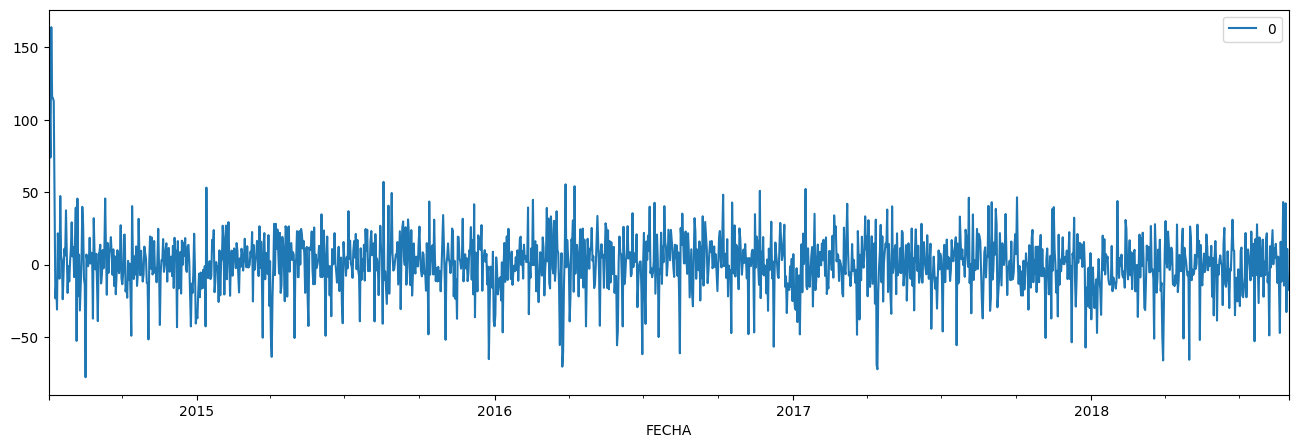

In [7]:
residuals = pd.DataFrame(results.resid)
residuals.plot(figsize = (16,5))
plt.show()

C:\Users\Cristian\AppData\Local\Temp\ipykernel_22464\2684965082.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


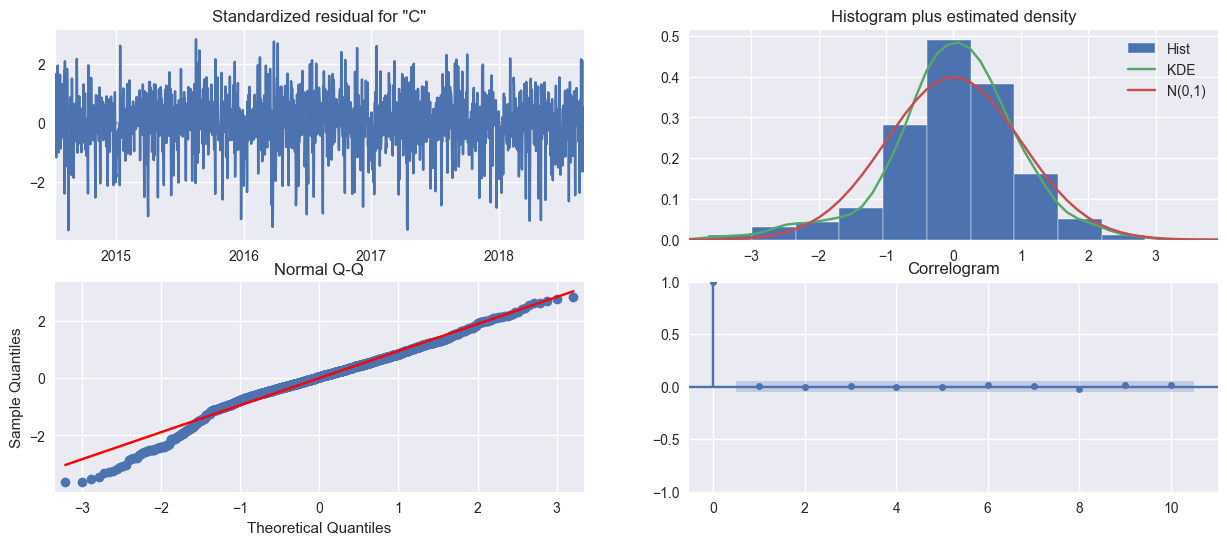

In [8]:
# OBSERVAMOS QUE EN EL CORRELOGRAMA TODOS LOS PUNTOS ESTAN DENTRO DEL INTERVALO DE CONFIANZA. 
# ESO QUIERE DECIR QUE HAY UNA BUENA ACOGIDA DEL MODELO CON LOS DATOS
plt.style.use('seaborn')
results.plot_diagnostics(figsize=(15,6))
plt.show()

In [9]:
pred = results.predict(start = len(train_data), end = len(data_lista)-1, typ="levels").rename("ARIMA Predictions")
pred

c:\Users\Cristian\anaconda3\envs\env_accidentalidad\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2018-09-01    108.091494
2018-09-02     69.575093
2018-09-03    114.412046
2018-09-04    116.045220
2018-09-05    119.998304
                 ...    
2018-11-15    117.541770
2018-11-16    125.158340
2018-11-17    113.636109
2018-11-18     72.524001
2018-11-19    112.443818
Freq: D, Name: ARIMA Predictions, Length: 80, dtype: float64

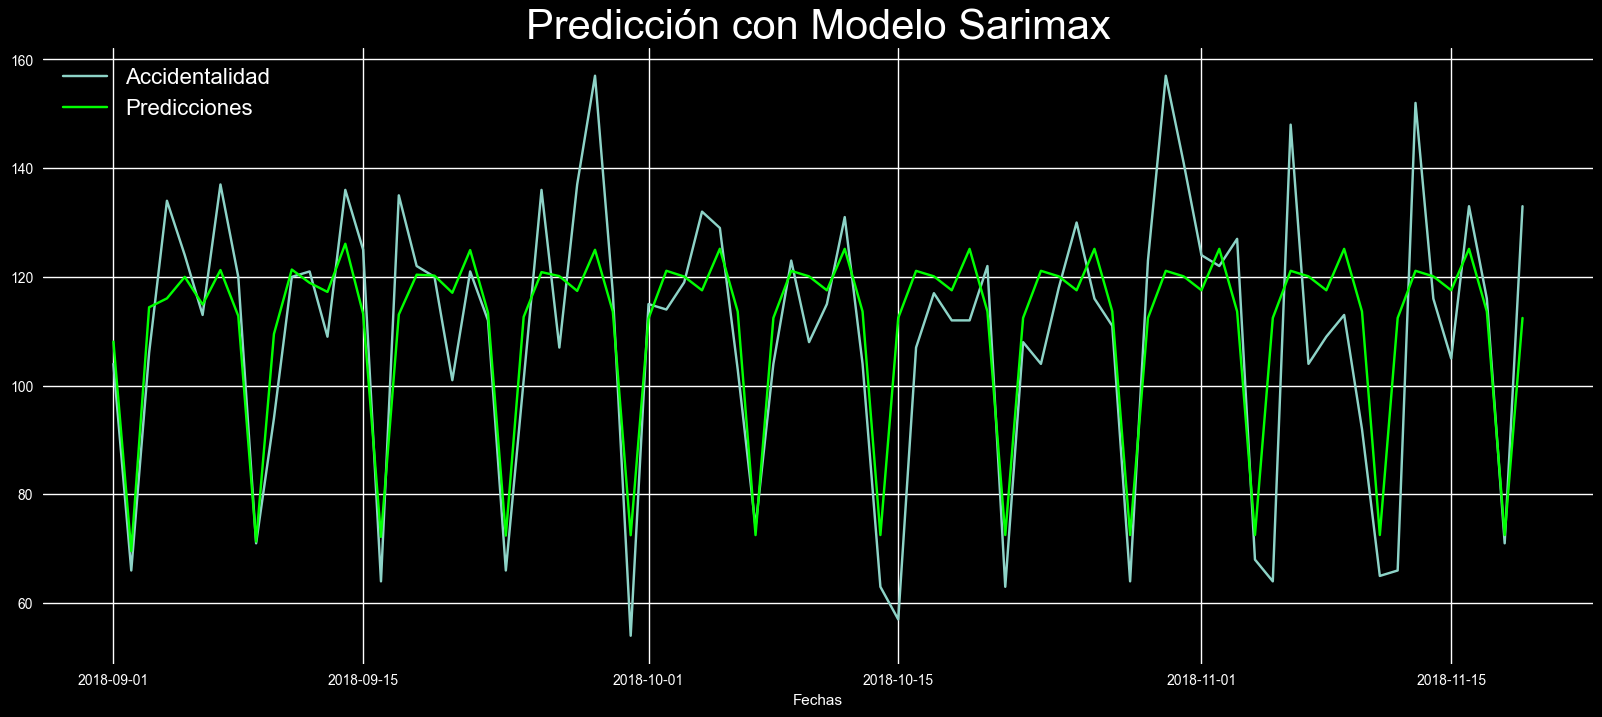

In [10]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(test_data, label="Accidentalidad")
plt.plot(pred, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Sarimax", fontsize=30)
plt.xlabel('Fechas')
plt.ylabel('')
plt.legend( fontsize=16)
plt.show()

In [11]:
arima_pred2 = results.predict(start='2018-11-20',end='2019-04-20', typ="levels").rename("ARIMA Predictions")
arima_pred2

c:\Users\Cristian\anaconda3\envs\env_accidentalidad\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2018-11-20    121.116564
2018-11-21    120.096055
2018-11-22    117.541780
2018-11-23    125.158369
2018-11-24    113.636111
                 ...    
2019-04-16    121.116562
2019-04-17    120.096064
2019-04-18    117.541783
2019-04-19    125.158360
2019-04-20    113.636115
Freq: D, Name: ARIMA Predictions, Length: 152, dtype: float64

C:\Users\Cristian\AppData\Local\Temp\ipykernel_22464\960724901.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


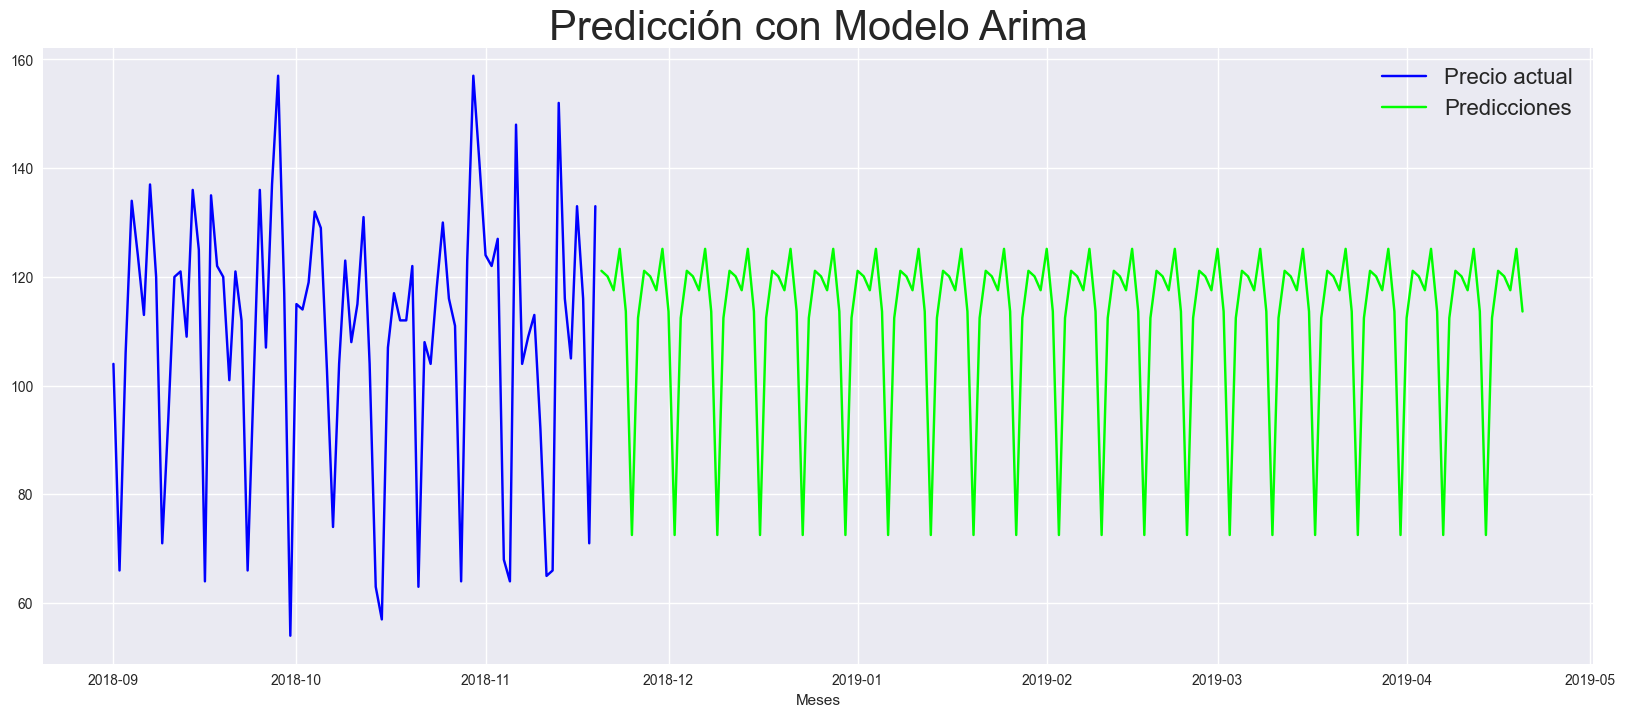

In [12]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data,color="blue" ,label="Precio actual")
plt.plot(arima_pred2, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16)
plt.show()

In [13]:
#Definimos las métricas de evaluación
def evaluacion_metrica(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [14]:
evaluacion_metrica(test_data,pred)

Evaluation metric results:
MSE is : 244.03842227917866
MAE is : 11.305782342657979
RMSE is : 15.621729170587315
MAPE is : 11.567677367196408
R2 is : 0.6069249684686623

